In [1]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"},
]

In [2]:
friendship_pairs = [
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (5, 7),
    (6, 8),
    (7, 8),
    (8, 9),
]

In [3]:
# Inicializar el dict con una lista vacía para cada id de usuario:
friendships = {user["id"]: [] for user in users}
# Y pasar por todos los pares de amistad para llenarlo:
for i, j in friendship_pairs:
    friendships[i].append(j)  # Agregar j como amigo de i
    friendships[j].append(i)  # Agregar i como amigo de j

friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [4]:
def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)


total_connections = sum(number_of_friends(user) for user in users)

total_connections

24

In [5]:
num_users = len(users)  # longitud de la lista de usuarios
avg_connections = total_connections / num_users  # 24 / 10 == 2,4
avg_connections

2.4

In [6]:
# Crea una lista (user_id, number_of_friends).
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]
num_friends_by_id.sort(  # Ordena la lista
    key=lambda id_and_friends: id_and_friends[1],  # por num_friends
    reverse=True,
)  # del mayor al menor

# Cada par es (user_id, num_friends):
# [(1, 3), (2, 3), (3, 3), (5, 3), (8, 3),
# (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]

num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [7]:
def foaf_ids_bad(user):
    """foaf is short for "friend of a friend" """
    return [
        foaf_id
        for friend_id in friendships[user["id"]]
        for foaf_id in friendships[friend_id]
    ]


foaf_ids_bad(users[0])

print(friendships[0])
print(friendships[1])
print(friendships[2])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [8]:
from collections import Counter  # no cargado inicialmente


def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]  # Para cda uni de mis amigos
        for foaf_id in friendships[friend_id]  # encuentra sus amigos
        if foaf_id != user_id  # que no son yo
        and foaf_id  ## y no son mis amigos
        not in friendships[user_id]
    )


print(friends_of_friends(users[3]))  # contador ({0:2, %:1})

Counter({0: 2, 5: 1})


In [9]:
interests = [
    (0, "Hadoop"),
    (0, "Big Data"),
    (0, "HBase"),
    (0, "Java"),
    (0, "Spark"),
    (0, "Storm"),
    (0, "Cassandra"),
    (1, "NoSQL"),
    (1, "MongoDB"),
    (1, "Cassandra"),
    (1, "HBase"),
    (1, "Postgres"),
    (2, "Python"),
    (2, "scikit-learn"),
    (2, "scipy"),
    (2, "numpy"),
    (2, "statsmodels"),
    (2, "pandas"),
    (3, "R"),
    (3, "Python"),
    (3, "statistics"),
    (3, "regression"),
    (3, "probability"),
    (4, "machine learning"),
    (4, "regression"),
    (4, "decision trees"),
    (4, "libsvm"),
    (5, "Python"),
    (5, "R"),
    (5, "Java"),
    (5, "C++"),
    (5, "Haskell"),
    (5, "programming languages"),
    (6, "statistics"),
    (6, "probability"),
    (6, "mathematics"),
    (6, "theory"),
    (7, "machine learning"),
    (7, "scikit-learn"),
    (7, "Mahout"),
    (7, "neural networks"),
    (8, "neural networks"),
    (8, "deep learning"),
    (8, "Big Data"),
    (8, "artificial intelligence"),
    (9, "Hadoop"),
    (9, "Java"),
    (9, "MapReduce"),
    (9, "Big Data"),
]

In [10]:
def data_scientists_who_like(target_interest):
    """Find the ids of all users who loke the target interest."""
    return [
        user_id
        for user_id, user_interest in interests
        if user_interest == target_interest
    ]


data_scientists_who_like("Java")

[0, 5, 9]

In [11]:
from collections import defaultdict

# Las claves son intereses, los valores son listsa de user_ids con ese interes
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [12]:
# Las claves son user_ids, los calores son listas de intereses para ese user_id
interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [13]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )


most_common_interests_with(users[0])

Counter({9: 3, 1: 2, 8: 1, 5: 1})

In [14]:
salaries_and_tenures = [
    (83000, 8.7),
    (88000, 8.1),
    (48000, 0.7),
    (76000, 6),
    (69000, 6.5),
    (76000, 7.5),
    (60000, 2.5),
    (83000, 10),
    (48000, 1.9),
    (63000, 4.2),
]

In [15]:
# las claves conlos años, los valores son las listas de los salarios por antigüedad
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

# Las claves son años, cada valor es el slario medio para dicha antiguedad
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [16]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "menos de dos"
    elif tenure < 5:
        return "entre dos o cinco"
    else:
        return "más de cinco"


tenure_bucket(6)

'más de cinco'

In [17]:
# Las claves son buckets de años de antiguedad, los valores son las listas de salarios para bucket

salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

salary_by_tenure_bucket

defaultdict(list,
            {'más de cinco': [83000, 88000, 76000, 69000, 76000, 83000],
             'menos de dos': [48000, 48000],
             'entre dos o cinco': [60000, 63000]})

In [18]:
# Las claves son buckets de años de antigüedad, son los valores son el salario medio para cada bucket

average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'más de cinco': 79166.66666666667,
 'menos de dos': 48000.0,
 'entre dos o cinco': 61500.0}

In [19]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "de pago"
    elif years_experience < 8.0:
        return "no de pago"
    else:
        return "de pago"


predict_paid_or_unpaid(2)

'de pago'

In [20]:
interests = [
    (0, "Hadoop"),
    (0, "Big Data"),
    (0, "HBase"),
    (0, "Java"),
    (0, "Spark"),
    (0, "Storm"),
    (0, "Cassandra"),
    (1, "NoSQL"),
    (1, "MongoDB"),
    (1, "Cassandra"),
    (1, "HBase"),
    (1, "Postgres"),
    (2, "Python"),
    (2, "scikit-learn"),
    (2, "scipy"),
    (2, "numpy"),
    (2, "statsmodels"),
    (2, "pandas"),
    (3, "R"),
    (3, "Python"),
    (3, "statistics"),
    (3, "regression"),
    (3, "probability"),
    (4, "machine learning"),
    (4, "regression"),
    (4, "decision trees"),
    (4, "libsvm"),
    (5, "Python"),
    (5, "R"),
    (5, "Java"),
    (5, "C++"),
    (5, "Haskell"),
    (5, "programming languages"),
    (6, "statistics"),
    (6, "probability"),
    (6, "mathematics"),
    (6, "theory"),
    (7, "machine learning"),
    (7, "scikit-learn"),
    (7, "Mahout"),
    (7, "neural networks"),
    (8, "neural networks"),
    (8, "deep learning"),
    (8, "Big Data"),
    (8, "artificial intelligence"),
    (9, "Hadoop"),
    (9, "Java"),
    (9, "MapReduce"),
    (9, "Big Data"),
]

In [21]:
words_and_counts = Counter(
    word for user, interest in interests for word in interest.lower().split()
)

words_and_counts.most_common()

[('big', 3),
 ('data', 3),
 ('java', 3),
 ('python', 3),
 ('learning', 3),
 ('hadoop', 2),
 ('hbase', 2),
 ('cassandra', 2),
 ('scikit-learn', 2),
 ('r', 2),
 ('statistics', 2),
 ('regression', 2),
 ('probability', 2),
 ('machine', 2),
 ('neural', 2),
 ('networks', 2),
 ('spark', 1),
 ('storm', 1),
 ('nosql', 1),
 ('mongodb', 1),
 ('postgres', 1),
 ('scipy', 1),
 ('numpy', 1),
 ('statsmodels', 1),
 ('pandas', 1),
 ('decision', 1),
 ('trees', 1),
 ('libsvm', 1),
 ('c++', 1),
 ('haskell', 1),
 ('programming', 1),
 ('languages', 1),
 ('mathematics', 1),
 ('theory', 1),
 ('mahout', 1),
 ('deep', 1),
 ('artificial', 1),
 ('intelligence', 1),
 ('mapreduce', 1)]

In [22]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)


big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2


In [23]:
# El signo de almohadilla marca el comienzo de un cmentario. Python ignnora los comentarios, pero son útiles para cualquiera que lea el código.

for i in [1, 2, 3, 4, 5]:
    print(i)  # primera línea del bloque "for i"
    for j in [1, 2, 3, 4, 5]:
        print(j)  # primera línea del bloque "for j"
        print(i + j)  # última línea del bloque "for j"
    print(i)  # última línea del bloque "for i"
print("terminado el bucle")


1
1
2
2
3
3
4
4
5
5
6
1
2
1
3
2
4
3
5
4
6
5
7
2
3
1
4
2
5
3
6
4
7
5
8
3
4
1
5
2
6
3
7
4
8
5
9
4
5
1
6
2
7
3
8
4
9
5
10
5
terminado el bucle


In [24]:
long_winded_computation = (
    1
    + 2
    + 3
    + 4
    + 5
    + 6
    + 7
    + 8
    + 9
    + 10
    + 11
    + 12
    + 13
    + 14
    + 15
    + 16
    + 17
    + 18
    + 19
    + 20
)

In [25]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
easier_to_read_list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [26]:
two_plus_three = 2 + 3

In [27]:
import re

my_regex = re.compile("[0-9]+", re.I)

In [28]:
import re as regex

my_regex = regex.compile("[0-9]+", regex.I)

In [29]:
from collections import defaultdict, Counter

lookup = defaultdict(int)  # valor predeterminado de 0 para claves nuevas
my_counter = Counter()  # contador vacío

In [30]:
match = 10
from re import *  # oh, ho, re tiene una funcion que se llama igual

print(match)  # "<function match at 0x10281e6a8"

<function match at 0x0000026F32F1E020>


In [31]:
def double(x):
    """
    this is where you put an optional docstring that explains what the functions. For example, this function multiplies its input by 2.
    """
    return x * 2


double(4)

8

In [32]:
def apply_to_one(f):
    """
    Calls the function f with 1 as its argument"""
    return f(1)


my_double = double  # se refiere a la funcion anteriormente definida
x = apply_to_one(my_double)  # es igual a dos
x

2

In [33]:
y = apply_to_one(lambda x: x + 4)  # es igual a cinco
y

5

In [34]:
another_double = lambda x: 2 * x  # no haga esto


def another_double(x):
    """Do this instead"""
    return 2 * x

In [35]:
def my_print(menssaje="my default message"):
    print(menssaje)


my_print("hello")  # imprime "hello"
my_print()  # imprime "my default message"

hello
my default message


In [36]:
def full_name(first="What's s-his-name", last="Something"):
    return first + " " + last


full_name("Joel", "Grus")
# full_name("Joel")
# full_name(last="Grus")

'Joel Grus'

In [37]:
single_quoted_string = "date science"
double_quoted_string = "data science"

In [38]:
tab_string = "\t"  # representa el carácter del tabulador
len(tab_string)  # es igual a 1

1

In [39]:
not_tab_string = r"\t"  # representa los caracteres \ y t
len(not_tab_string)  # es igual a 2

2

In [40]:
multi_line_string = """this is the first line,
this is the second line
and this is the third line."""

In [41]:
first_name = "Joel"
last_name = "Grus"

In [42]:
full_name1 = first_name + " " + last_name  # suma de cadenas
full_name2 = "{0} {1}".format(first_name, last_name)  # formato de cadena
full_name3 = f"{first_name} {last_name}"

In [43]:
try:
    print(0 / 0)
except ZeroDivisionError:
    print("no se puede dividir por cero")

no se puede dividir por cero


In [44]:
integer_list = [1, 2, 3]
heterogeneous_list = ["string", 0.1, True]
list_of_lists = [integer_list, heterogeneous_list, []]
list_length = len(integer_list)  # es igual a 3
list_sum = sum(integer_list)  # es igual a 6

list_length, list_sum, list_of_lists

(3, 6, [[1, 2, 3], ['string', 0.1, True], []])

In [45]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
zero = x[0]  # es igual a 0, las listas estásn indexadas al 0
one = x[1]  # es igual a 1
nine = x[-1]  # es igual a 9, 'pitónico' para el último elemento
eight = x[-2]  # es igual a 8, 'pitónico' para el penúltimo elemento
x[0] = -1  # ahora x es [-1,1,2,3,4,5,6,7,8,9]

In [46]:
first_three = x[:3]  # [-1, 1, 2]
three_to_end = x[3:]  # [3, 4, ..., 9]
one_to_four = x[1:5]  # [1, 2, 3, 4]
last_three = x[-3:]  # [7, 8, 9]
without_first_and_last = x[1:-1]  # [1, 2, ..., 8]
copy_of_x = x[:]  # [-1, 1, 2, ..., 9]

In [47]:
every_third = x[::3]  # [-1, 3, 6, 9]
five_to_three = x[5:2:-1]  # [5, 4, 3]

every_third, five_to_three

([-1, 3, 6, 9], [5, 4, 3])

In [48]:
1 in [1, 2, 3]  # True
0 in [1, 2, 3]  # False

False

In [49]:
x = [1, 2, 3]
x.extend([4, 5, 6])  # x es ahora [1, 2, 3, 4, 5, 6]

x

[1, 2, 3, 4, 5, 6]

In [50]:
x = [1, 2, 3]
y = x + [4, 5, 6]  # y es [1, 2, 3, 4, 5, 6]; x no ha cambiado

y

[1, 2, 3, 4, 5, 6]

In [51]:
x = [1, 2, 3]
x.append(0)  # x es ahora [1, 2, 3, 0]
y = x[-1]  # y es 0
z = len(x)  # z es 4

x, y, z

([1, 2, 3, 0], 0, 4)

In [52]:
x, y = [1, 2]  # ahora x es 1, y es 2
x, y

(1, 2)

In [53]:
_, y = [1, 2]  # ahora y == 2, no nos importa el primer elemento


In [54]:
my_list = [1, 2]
my_tuple = (1, 2)

other_tuple = 3, 4
my_list[1] = 3  # my_list es ahora [1, 3]
try:
    my_tuple[1] = 3
except TypeError:
    print("no se puede reasignar un valor en una tupla")

no se puede reasignar un valor en una tupla


In [55]:
def sum_and_product(x, y):
    return (x + y), (x * y)


se = sum_and_product(2, 3)  # se es (5, 6)
s, p = sum_and_product(5, 10)  # s es 15, p es 50

se, s, p

((5, 6), 15, 50)

In [56]:
x, y = 1, 2  # ahora x es 1, y es 2
x, y = y, x  # forma pitónica de intercambiar las variables; ahora x es 2 y es 1

x, y

(2, 1)

In [57]:
empty_dict = {}  # pitónico
empty_dict2 = dict()  # menos pitónico
grades = {"Joel": 80, "Tim": 95}  # dict literal

In [58]:
joels_grade = grades["Joel"]  # es igual a 80
joels_grade

80

In [59]:
try:
    kates_grade = grades["Kate"]
except KeyError:
    print("Kate no está en el diccionario de calificaciones")

Kate no está en el diccionario de calificaciones


In [60]:
joel_has_grade = "Joel" in grades  # es True
kate_has_grade = "Kate" in grades  # es False

joel_has_grade, kate_has_grade

(True, False)

In [61]:
joels_grade = grades.get("Joel", 0)  # es igual a 80
kates_grade = grades.get("Kate", 0)  # es igual a 0
no_ones_grade = grades.get("No One")  # es valor predeterminado None

joels_grade, kates_grade, no_ones_grade

(80, 0, None)

In [62]:
grades["Tim"] = 90  # reeplaza el valor anterior
grades["Kate"] = 100  # añade una tercera entrada
num_students = len(grades)  # es igual a 3

grades, num_students

({'Joel': 80, 'Tim': 90, 'Kate': 100}, 3)

In [63]:
tweet = {
    "user": "joelgrus",
    "text": "Data Science is Awesome",
    "retweet_count": 100,
    "hashtags": ["#data", "#science", "#awesome", "yolo"],
}

tweet

{'user': 'joelgrus',
 'text': 'Data Science is Awesome',
 'retweet_count': 100,
 'hashtags': ['#data', '#science', '#awesome', 'yolo']}

In [64]:
tweet_keys = tweet.keys()  # interable para las claves
tweet_values = tweet.values()  # interable para los valores
tweet_items = tweet.items()  # interable para las tuplas (clave, valor)
"user" in tweet_keys  # True, pero no pitonico
"user" in tweet  # forma pitónica de comprobar claves
"joelgrus" in tweet_values  # True (es lenta, pero la única forma de verificar)

True

In [65]:
document = ["data science", "big data", "data engineering"]

word_counts = {}

for word in document:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

In [66]:
word_counts = {}
for word in document:
    try:
        word_counts[word] += 1
    except KeyError:
        word_counts[word] = 1

In [67]:
word_counts = {}
for word in document:
    previous_counts = word_counts.get(word, 0)
    word_counts[word] = previous_counts + 1

In [68]:
from collections import defaultdict

word_counts = defaultdict(int)
for word in document:
    word_counts[word] += 1

In [69]:
dd_list = defaultdict(list)  # list() produce una lista vacía
dd_list[2].append(1)  # ahora dd_list contiene {2: [1]}
dd_dict = defaultdict(dict)  # dict() produce un dict vacío
dd_dict["Joel"]["City"] = "Seattle"  # {"Joel" : {"City": Seattle"}}
dd_pair = defaultdict(lambda: [0, 0])
dd_pair[2][1] = 1  # ahora dd_pair contiene {2: [0, 1]}

In [70]:
from collections import Counter

c = Counter([0, 1, 2, 0])
c

Counter({0: 2, 1: 1, 2: 1})

In [71]:
# Recuerde, document es una lista de palabras
word_counts = Counter(document)
word_counts

Counter({'data science': 1, 'big data': 1, 'data engineering': 1})

In [72]:
# imprime las 10 palabras más comunes y sus contadores
for word, count in word_counts.most_common(10):
    print(word, ":", count)

data science : 1
big data : 1
data engineering : 1


In [73]:
primes_below_10 = {2, 3, 5, 7}

In [74]:
s = set()
s.add(1)  # s es ahora {1}
s.add(2)  # s es ahora {1, 2}
s.add(2)  # s sigue siendo {1, 2}
x = len(s)  # es igual a 2
y = 2 in s  # es igual a True
z = 3 in s  # es igual a False

In [75]:
stopwords_list = ["a", "an", "at"] + ["yet", "you"]
"zip" in stopwords_list  # False, pero hay que verificar cada elemento
stopwords_set = set(stopwords_list)
"zip" in stopwords_set  # mucho más rápido

False

In [76]:
item_list = [1, 2, 3, 1, 2, 3]
num_items = len(item_list)  # 6
item_set = set(item_list)  # {1, 2, 3}
num_distinct_items = len(item_set)  # 3
distinct_item_list = list(item_set)  # [1, 2, 3]

item_list, num_items, num_distinct_items, distinct_item_list

([1, 2, 3, 1, 2, 3], 6, 3, [1, 2, 3])

In [77]:
if 1 > 2:
    message = "if only 1 were greater than two..."
elif 1 < 3:
    message = "elif stands for 'else if'"
else:
    message = "when all else fails use else (if you want to)"

In [78]:
parity = "even" if x % 2 == 0 else "odd"

parity

'even'

In [79]:
x = 0
while x < 10:
    print(f"{x} is less than 10")
    x += 1

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [80]:
# rande(10) en los numeros0,1,...,9
for x in range(10):
    print(f"{x} is less than 10")

0 is less than 10
1 is less than 10
2 is less than 10
3 is less than 10
4 is less than 10
5 is less than 10
6 is less than 10
7 is less than 10
8 is less than 10
9 is less than 10


In [81]:
for x in range(10):
    if x == 3:
        continue  # ca inmediatamente a la siguiente repeticion
    if x == 5:
        break  # sale del bucle por completo
    print(x)

0
1
2
4


In [82]:
one_is_less_than_two = 1 < 2  # es igual a True
true_equals_false = True == False  # es igual a False

In [83]:
x = None
assert x == None, "this is the not the Pythonic way to check fo None"
assert x is None, "this is the Pythonic way to check for None"

In [84]:
s = "Hello python"
first_char = s[0] if s else ""
first_char = s and s[0]  # forma mas rapida

In [85]:
safe_x = x or 0

safe_x = x if x is not None else 0

safe_x

0

In [86]:
all([True, 1, {3}])  # True, todos son verdaderos
all([True, 1, {}])  # False, {} is falso
any([True, 1, {}])  # True, True is verdadero
all([])  # True, no hay elementos falsos en la lista
any([])  # False, no hay elementos verdaderos en la lista

False

In [87]:
x = [4, 1, 2, 3]
y = sorted(x)  # y es [1, 2, 3, 4]; x no ha cambiado
x.sort()  # ahora x es [1, 2, 3, 4]

y, x

([1, 2, 3, 4], [1, 2, 3, 4])

In [88]:
# ordena la lista por valor absoluto de mayor a menor
x = sorted([-4, 1, -2, 3], key=abs, reverse=True)  # is [-4, 3, -2, 1]

# ordena las palabras y contadores del contador mayor al meor
wc = sorted(
    word_counts.items(), key=lambda word_and_count: word_and_count[1], reverse=True
)

x, wc

([-4, 3, -2, 1],
 [('data science', 1), ('big data', 1), ('data engineering', 1)])

In [89]:
even_numbers = [x for x in range(5) if x % 2 == 0]  # [0, 2, 4]
squares = [x * x for x in range(5)]  # [0, 1, 4, 9, 16]
even_squares = [x * x for x in even_numbers]  # [0, 4, 16]

even_numbers, squares, even_squares

([0, 2, 4], [0, 1, 4, 9, 16], [0, 4, 16])

In [90]:
zeros = [0 for _ in even_numbers]  # tiene la misma longitud que even_numbers
zeros

[0, 0, 0]

In [91]:
increasing_pairs = [
    (x, y)  # solo pares con x < y
    for x in range(10)  # range(bajo, alto) es igual a
    for y in range(x + 1, 10)
]  # [bajo, bajo+1, ... alto-1]

increasing_pairs

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

In [92]:
assert 1 + 1 == 2
assert 1 + 1 == 2, "1 + 1 should equal 2 but didn't"

In [93]:
def smallest_item(xs):
    return min(xs)


assert smallest_item([10, 20, 5, 40]) == 5
assert smallest_item([1, 0, -1, 2]) == -1

smallest_item([10, 20, 5, 40])

5

In [94]:
def smallest_item(xs):
    assert xs, "empty list has no smallest item"
    return min(xs)


smallest_item([10, 20, 5, 40])

5

In [95]:
class CountingClicker:
    """A class can/should have a doctring, just like a function"""

    def __init__(self, count: int = 0):
        self.count = count

    def __repr__(self):
        return f"CountingClicker(count={self.count})"

    def click(self, num_times=1):
        """Click the clicker some number of times."""
        self.count += num_times

    def read(self):
        return self.count

    def reset(self):
        self.count = 0


# --- ZONA DE PRUEBAS ---

print("1. Creando el clicker...")
clicker = CountingClicker()
# Esto usa tu método __repr__ automáticamente
print(f"   Estado actual: {clicker}")

# Prueba 1: Verificar inicio
assert clicker.read() == 0, "clicker should start with count 0"
print("   ✅ Prueba de inicio pasada.")

print("2. Haciendo clicks...")
clicker.click()
clicker.click()
print(f"   Estado actual: {clicker}")

# Prueba 2: Verificar conteo (Ojo: hiciste 2 clicks, así que esperamos un 2)
assert clicker.read() == 2, "after two clicks, count should be 2"
print("   ✅ Prueba de conteo pasada.")

print("3. Reseteando...")
clicker.reset()
print(f"   Estado actual: {clicker}")

# Prueba 3: Verificar reset
assert clicker.read() == 0, "after reset, count should be back to 0"
print("   ✅ Prueba de reset pasada.")

print("-" * 30)
print("¡ÉXITO! Todas las aserciones son correctas.")


1. Creando el clicker...
   Estado actual: CountingClicker(count=0)
   ✅ Prueba de inicio pasada.
2. Haciendo clicks...
   Estado actual: CountingClicker(count=2)
   ✅ Prueba de conteo pasada.
3. Reseteando...
   Estado actual: CountingClicker(count=0)
   ✅ Prueba de reset pasada.
------------------------------
¡ÉXITO! Todas las aserciones son correctas.


In [96]:
clicker1 = CountingClicker()  # inicializado a 0
clicker2 = CountingClicker(100)  # empieza con count=100
clicker3 = CountingClicker(count=100)  # forma más explícita de hacer lo mismo

In [97]:
# una subclase hereda todo el comportamiento de su clase padre.
class NoResetClicker(CountingClicker):
    # esta clase tien los mismos metodo de CountingClicker
    # salvo que tiene su metodo reset que no hace nada
    def reset(self):
        pass


clicker2 = NoResetClicker()
assert clicker2.read() == 0
clicker2.click()
assert clicker2.read() == 1
clicker2.reset()
assert clicker2.read() == 1, "reset shouldn't do anytihing"

In [98]:
def generate_range(n):
    i = 0
    while i < n:
        yield I  # cada llamada a yield produce un valor del generador
        i += 1


generate_range(2)

<generator object generate_range at 0x0000026F386EA980>

In [99]:
for i in generate_range(10):
    print(f"i: {i}")

i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE
i: re.IGNORECASE


In [100]:
def natural_numbers():
    """return 1,2,3,..."""

    n = 1
    while True:
        yield n
        n += 1


natural_numbers()

<generator object natural_numbers at 0x0000026F386EABC0>

In [101]:
evens_velow_20 = (i for i in generate_range(20) if i % 2 == 0)
evens_velow_20

<generator object <genexpr> at 0x0000026F38792CF0>

In [102]:
# ninguno de estos calculos *hace* nada hasta que iteramos
data = natural_numbers()
evens = (x for x in data if x % 2 == 0)
even_squares = (x**2 for x in evens)
even_squares_ending_in_six = (x for x in even_squares if x % 10 == 6)

evens, even_squares, even_numbers

(<generator object <genexpr> at 0x0000026F38793ED0>,
 <generator object <genexpr> at 0x0000026F38793B90>,
 [0, 2, 4])

In [103]:
names = ["Alice", "Bob", "Charlie", "Debbie"]

# no pitonico
for i in range(len(names)):
    print(f"name {i} is {names[i]}")

# tampoco pitonico
i = 0
for name in names:
    print(f"name {i} is {names[i]}")

# pitonico
for i, name in enumerate(names):
    print(f"name {i} is {name}")

name 0 is Alice
name 1 is Bob
name 2 is Charlie
name 3 is Debbie
name 0 is Alice
name 0 is Alice
name 0 is Alice
name 0 is Alice
name 0 is Alice
name 1 is Bob
name 2 is Charlie
name 3 is Debbie


In [104]:
import random

random.seed(10)  # esto asegura que obtenemos los mismo resultadoscada vez

four_unifirm_randoms = [random.random() for i in range(4)]

In [105]:
random.seed(10)  # establece la semilla en 10
print(random.random())  # 0.5714025946899135
random.seed(10)  # reinicia la semilla en 10
print(random.random())  # 0.5714025946899135 de nuevo

0.5714025946899135
0.5714025946899135


In [106]:
random.randrange(10)  # selecciona aleatoriamente de range(10) = [1,2,3,... ,9]
random.randrange(3, 6)  # selecciona aleatoriamente de range(3,6) =[3,4,5]

4

In [107]:
up_to_ten = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
random.shuffle(up_to_ten)
print(
    up_to_ten
)  # [7, 2, 6, 8, 9, 4, 10, 1, 3,5] (sus resultados serán probablementediferentes)

[5, 6, 9, 2, 3, 7, 8, 4, 1, 10]


In [108]:
my_best_friend = random.choice(["Alice", "Bob", "Charlie"])
my_best_friend

'Bob'

In [109]:
lottery_numbers = range(60)
winning_numbers = random.sample(lottery_numbers, 6)

winning_numbers

[4, 15, 47, 23, 2, 26]

In [110]:
four_with_replacement = [random.choice(range(10)) for _ in range(4)]
print(four_with_replacement)

[2, 9, 5, 6]


In [111]:
import re

re_examples = [
    not re.match("a", "cat"),  # todas son True
    re.search("a", "cat"),  # 'cat' no empieza por 'a'
    not re.search("c", "dog"),  # 'cat' contiene una 'a'
    3 == len(re.split("[ab]", "carbs")),  # partido en a o b para ['c','r','s']
    "R-D-" == re.sub("[0-9]", "-", "R2D2"),  # reemplaza digitos por guiones
]

assert all(re_examples), "all the regex examples should be True"

In [112]:
list1 = ["a", "b", "c"]
list2 = [1, 2, 3]

# zip es perezoso, de modo que hay que hacer algo como lo siguiente
[pair for pair in zip(list1, list2)]  # es [('a',1),('b',2),('c',3)]

[('a', 1), ('b', 2), ('c', 3)]

In [113]:
pairs = [("a", 1), ("b", 2), ("c", 3)]
letters, numbers = zip(*pairs)

letters, numbers

(('a', 'b', 'c'), (1, 2, 3))

In [114]:
letters, numbers = zip(("a", 1), ("b", 2), ("c", 3))

letters, numbers

(('a', 'b', 'c'), (1, 2, 3))

In [115]:
def add(a, b):
    return a + b


add(1, 2)  # devuelve 3
try:
    add([1, 2])
except TypeError:
    print(" add exepcts two inputs")
add(*[1, 2])  # devuelve 3

 add exepcts two inputs


3

In [116]:
def doubler(f):
    # Aqui definimos una nueva funcion que mantien una referencia a f
    def g(x):
        return 2 * f(x)

    # y devuelve esa nueva funcion
    return g


doubler(4)

<function __main__.doubler.<locals>.g(x)>

In [117]:
def f1(x):
    return x + 1


g = doubler(f1)
assert g(3) == 8, "(3+1) * 2 should equal 8"
assert g(-1) == 0, "(-1+1) * 2 should equals 0"

In [118]:
def f2(x, y):
    return x + y


g = doubler(f2)
try:
    g(1, 2)
except TypeError:
    print("cas defined, g only takes one argument")

cas defined, g only takes one argument


In [119]:
def magic(*args, **kwargs):
    print("unnamed args:", args)
    print("keyword args:", kwargs)


magic(1, 2, key="word", key2="word2")
# imprime
# argumentos sin nombre: (1,2)
# argumentos de la palabra clave: {'key':'word','key2':'word2'}


unnamed args: (1, 2)
keyword args: {'key': 'word', 'key2': 'word2'}


In [120]:
def other_way_magic(x, y, z):
    return x + y + z


x_y_list = [1, 2]
z_dict = {"z": 3}

assert other_way_magic(*x_y_list, **z_dict) == 6, "1 + 2 + 3 should be 6+ "

In [121]:
def doubler_correct(f):
    """works no matter what kind of inputs f expects"""

    def g(*args, **kwargs):
        """whatever arguments g is supplied, pas them through to f"""
        return 2 * f(*args, **kwargs)

    return g


def f2(x, y):
    return x + y


g = doubler_correct(f2)

assert g(1, 2) == 6, "doubler should work now"

In [122]:
def add(a, b):
    return a + b


assert add(10, 5) == 15, "+ is valid for numbers"
assert add([1, 2], [3]) == [1, 2, 3], "+ is valid for lists"
assert add("hi ", "there") == "hi there", "+ is valid for strings"

try:
    add(10, "five")
except TypeError:
    print("cannot add an int to a string")

cannot add an int to a string


In [123]:
def add(a: int, b: int) -> int:
    return a + b


add(10, 5)  # le gustaria que esto fuera correcto
add("hi ", "there")  # le gustaria que esto no fuera correcto

'hi there'

In [124]:
def dot_product(x, y):
    # aun no hemos definido Vector, pero imaginese que lo habiamos echo
    def dot_product(x: Vector, y: Vector) -> float:
        pass

In [125]:
from typing import Union


def secretly_ugly_function(value, operation): ...
def ugly_function(value: int, operation: Union[str, int, float, bool]) -> int:
    pass

In [126]:
def total(xs: list) -> float:
    return sum(total)

In [127]:
from typing import List  # observe la L mayuscula


def total(xs: List[float]) -> float:
    return sum(total)

In [128]:
# Así es como se anota el tipo de variables cuando se definen.
# Pero esto es innecesario; es "obvio" que x es un int.
x: int = 5

In [129]:
values = []  # ¿cuál es mi tipo?
best_so_far = None  # ¿cuál es mi tipo?

In [130]:
from typing import Optional

values: List[int] = []
best_so_far: Optional[float] = None  # permitido ser un float o None

In [131]:
from typing import Dict, Iterable, Tuple

lazy = True  # Necesitas definir esto antes del 'if'
# ----------------------------------------------

# las claves son strings, los valores son ints
counts: Dict[str, int] = {"data": 1, "science": 2}

# las listas y los generadores son ambos iterables
if lazy:
    evens: Iterable[int] = (x for x in range(10) if x % 2 == 0)
else:
    # Nota: También es buena práctica mantener la consistencia en el tipado aquí
    evens: Iterable[int] = [0, 2, 4, 6, 8]

# las tuplas especifican un tipo para cada elemento
triple: Tuple[int, float, int] = (10, 2.3, 5)

In [132]:
from typing import Callable


# La comprobación de tipos dice que el repetidor es una función que admite
# dos argumentos, un string y un int, y devuelve un string.
def twice(repeater: Callable[[str, int], str], s: str) -> str:
    return repeater(s, 2)


def comma_repeater(s: str, n: int) -> str:
    n_copies = [s for _ in range(n)]
    return ", ".join(n_copies)


assert twice(comma_repeater, "type hints") == "type hints, type hints"

In [133]:
Number = int
Numbers = List[Number]


def total(xs: Numbers) -> Number:
    return sum(xs)

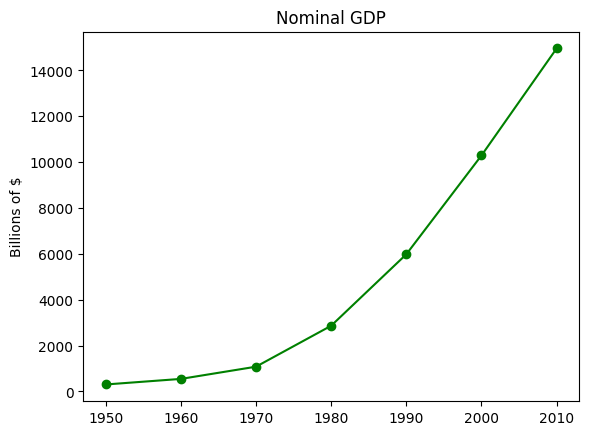

In [134]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
# crea un gráfico de líneas, años en el eje x, cantidades en el eje y
plt.plot(years, gdp, color="green", marker="o", linestyle="solid")
# añade un título
plt.title("Nominal GDP")
# añade una etiqueta al eje y
plt.ylabel("Billions of $")
plt.show()

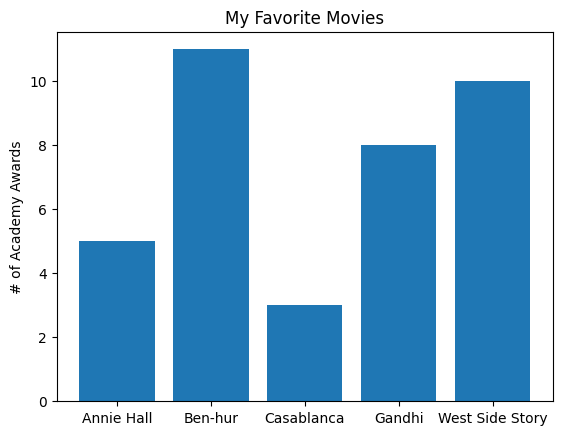

In [135]:
movies = ["Annie Hall", "Ben-hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# dibuja barras con coordenadas x de la izquierda [0,1,2,3,4], alturas [num_oscars]

plt.bar(range(len(movies)), num_oscars)
plt.title("My Favorite Movies")  # añade un titulo
plt.ylabel("# of Academy Awards")  # tiqueta del eje y
plt.xticks(
    range(len(movies)), movies
)  # etiqueta del ejex con los nombres de las peliculas en el centro de las barras

plt.show()

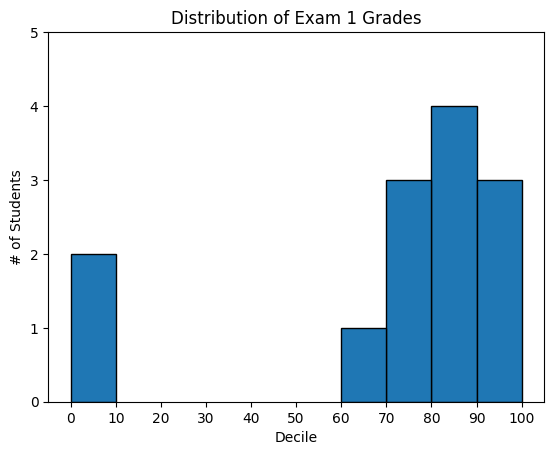

In [136]:
from collections import Counter

grades = [
    83,
    95,
    91,
    87,
    70,
    0,
    85,
    82,
    100,
    67,
    73,
    77,
    0,
]  # Agupa las notas en bucket por decil, pero pone 100 con los 90
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
plt.bar(
    [
        x + 5
        for x in histogram.keys()  # # mueve a la derecha en 5
    ],
    histogram.values(),  # # da cada barra su altura correcta
    10,  # da a cada barra una altura de 10
    edgecolor=(0, 0, 0),
)  # bordes negros para cada barra
plt.axis([-5, 105, 0, 5])  # eje x desde -5 hasta 105, eje y desde 0 hasta 5
plt.xticks(
    [
        10 * i
        for i in range(11)  # etiquetas del eje x en 0,10,..,100
    ]
)
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")

plt.show()

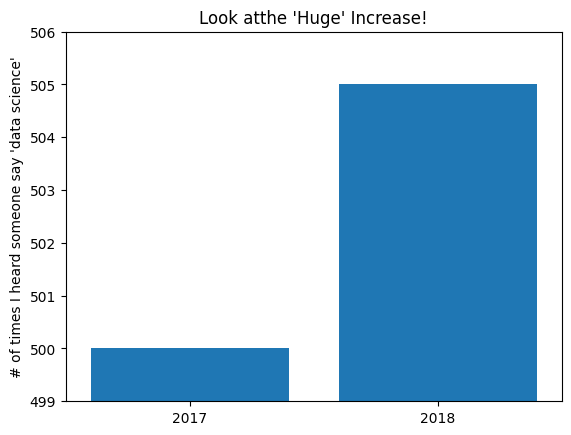

In [137]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# si no se jhcae esto, matplotlib etiquetara el eje x con 0,1 y añadira +2.013e3 en la esquina
plt.ticklabel_format(useOffset=False)
# el eje y erroneo solo muestra la parte sobre 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look atthe 'Huge' Increase!")

plt.show()

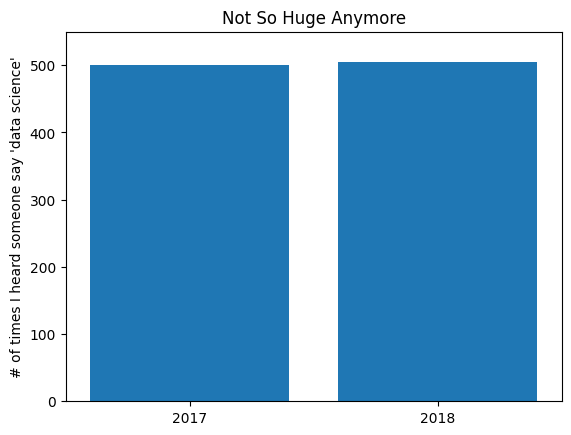

In [138]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)

# cambio del grafico anterior para ejes mas sensatos
plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")
plt.show()

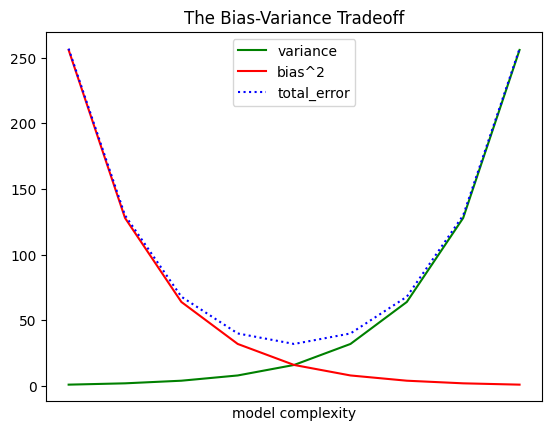

In [139]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]

total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]
# podemos hacer varias llamadas a plt.plot para mostrar varias series en el mismo grafico
plt.plot(xs, variance, "g-", label="variance")  # linea continua
plt.plot(xs, bias_squared, "r-", label="bias^2")  # liea de puntos y guiones
plt.plot(xs, total_error, "b:", label="total_error")  # linea de puntos
# como asignemos etiquetas a cada serie, obtendremos una leyenda gratis (loc=9 significa "arriba centro")
plt.legend(loc=9)
plt.xlabel("model complexity")
plt.xticks([])
plt.title("The Bias-Variance Tradeoff")

plt.show()

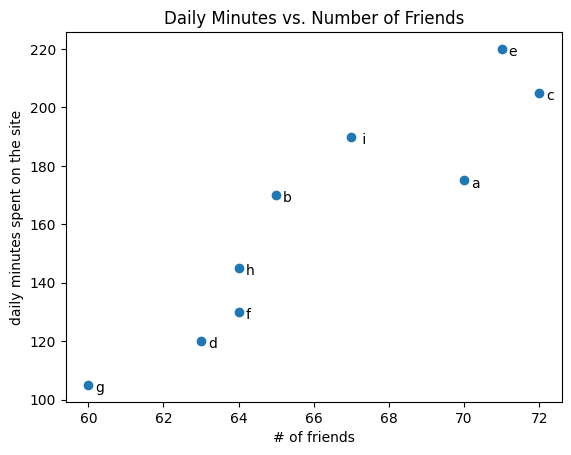

In [140]:
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',' i']

plt.scatter(friends, minutes)
# etiqueta cada punto

for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label, xy=(friend_count, minute_count),
    xytext=(5,-5),                          # pone la etiqueta con su punto
    textcoords='offset points')             # pero un poco desplazada

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")

plt.show()

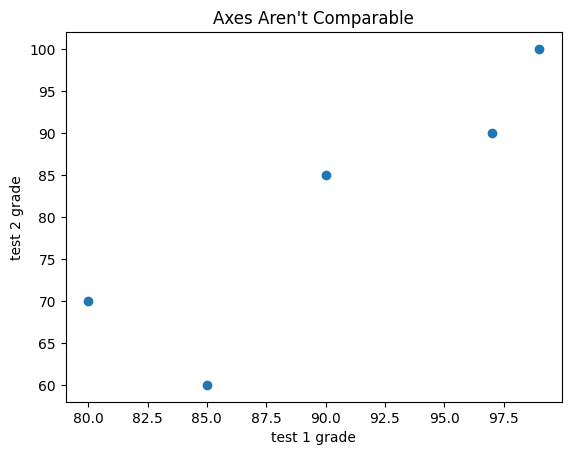

In [141]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")

plt.show()

capitulo 4 del libro algebra lineal

In [142]:
from typing import List

Vector = List[float]
height_weight_age = [70,170,40]             # [pulgadas, libras, años
grades=[95,80,75,62]                        # [examen1,examen2,examen3,examen4]

In [143]:
def add(v: Vector, w:Vector) -> Vector:
    """Adds corresponding elements"""
    assert len(v) == len(w), "vectors must be the same lenght"
    return[v_i + w_i for v_i, w_i in zip(v,w)]
assert add([1,2,3],[4,5,6]) == [5,7,9]

In [144]:
def subtract(v: Vector, w: Vector) -> Vector:
    """Subtracts corresponding elements"""
    assert len(v) == len(w), "vectors must be the same length"
    return [v_i - w_i for v_i, w_i in zip(v, w)]
assert subtract([5, 7, 9], [4, 5, 6]) == [1, 2, 3]

In [145]:
def vector_sum(vectors:List[Vector]) -> Vector:
    """sums all corresponding elements"""
    # comprueba que los vectores no esten vacion
    assert vectors, "no vectors provided!"
    # conprueba que los vectores tienen el mismo tamaño
    num_elements = len(vectors[0])
    assert all(len(v) == num_elements for v in vectors), "different sizes!"
    # el elemento i del resultado es la suma de cada vector i
    return [sum(vector[i] for vector in vectors) for i in range(num_elements)]
assert vector_sum([[1,2],[3,4],[5,6],[7,8]]) == [16,20]

In [146]:
def scalar_multiply(c:float,v:Vector)->Vector:
    """Multiplies every element by c"""
    return [c*v_i for v_i in v]
assert scalar_multiply(2,[1,2,3]) == [2,4,6]

scalar_multiply(2,[1,2,3])

[2, 4, 6]

In [147]:
def vector_mean(vectors: List[Vector]) -> Vector:
    """Computes the element-wise average"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))
assert vector_mean([[1,2],[3,4],[5,6]]) == [3,4]

vector_mean([[1,2],[3,4],[5,6]])

[3.0, 4.0]

In [148]:
def dot(v:Vector, w:Vector) -> float:
    """computers v_1 * w_1 + ... + v_n * W_n"""
    assert len(v) == len(w), "vecotes must ne same lenght"
    return sum(v_i * w_i for v_i, w_i in zip(v,w))
assert dot([1,2,3],[4,5,6]) == 32

dot([1,2,3],[4,5,6])

32

In [149]:
def sum_of_squares(v:Vector) -> float:
    """retunrs v_1 * w_1" + ... + v_n * w_n"""
    return dot(v,v)
assert sum_of_squares([1,2,3]) == 14                    # 1*1+2*2+3*3

sum_of_squares([1,2,3])

14

In [150]:
import math

def magnitude(v: Vector) -> float:
    """returns the magnitude (o length) of v"""
    return math.sqrt(sum_of_squares(v))
assert magnitude([3,4]) == 5

magnitude([6,8])

10.0

In [151]:
def squared_distance(v:Vector, w:Vector) -> float:
    """computes (v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(subtract(v,w))

def distance(v:Vector, w:Vector) -> float:
    """computes the distance between v and w"""
    return math.sqrt(squared_distance(v,w))

squared_distance([1,2,3],[4,5,6]),
#distance([1,2,3],[4,5,6])

(27,)

In [152]:
def distance(v:Vector,w:Vector)->float:
    return magnitude(subtract(v,w))


In [153]:
# otro alias de tipo
Matrix = List[List[float]]
A = [[1,2,3],[4,5,6]]                   # A tiene 2 filas y 3 columnas
B = [[1,2],[3,4],[5,6]]                 # B tiene 3 filas y 2 columnas

In [154]:
from typing import Tuple

def shape(A:Matrix) -> Tuple[int,int]:
    """returns (# of rows of A              # of columns of A)"""
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols
assert shape([[1,2,3],[4,5,6]]) == (2,3)

In [155]:
def  get_row(A:Matrix, i:int) -> Vector:
    """return the i-th row of A (as a Vector)"""
    return A[i]                                 #A[i] es ya la fila i

def get_column(A:Matrix, j:int) -> Vector:
    """returns the j-th column of A (as a Vector)"""
    return [A_i[j] for A_i in A]

In [156]:
from typing import Callable

def make_matrix(num_rows: int, num_cols:int, entry_fn:Callable[[int,int], float]) -> Matrix:
    """returns a num_rows x num_cols matrix whose (i,j)-th entry is entry_fn(i,j)"""
    return [[entry_fn(i,j) for j in range(num_cols)] for i in range(num_rows)]

In [157]:
def identity_matrix(n:int) -> Matrix:
    """returns the n x n identity matrix"""
    return make_matrix(n,n,lambda i,j: 1 if i == j else 0)
assert identity_matrix(5) == [[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]

identity_matrix(5)

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [158]:
friend_matrix = [
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # usuario 0
[1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # usuario 1
[1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # usuario 2
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # usuario 3
[0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # usuario 4
[0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # usuario 5
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # usuario 6
[0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # usuario 7
[0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # usuario 8
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # usuario 9

In [159]:
assert friend_matrix[0][2] == 1,"0 and 2 are friends"
assert friend_matrix[0][8] == 0,"0 and 8 are not friends"

In [160]:
# basta con mirar en una fila

friends_of_five = [i for i, is_friend in enumerate(friend_matrix[5]) if is_friend]

capitulo 5: Estadistica

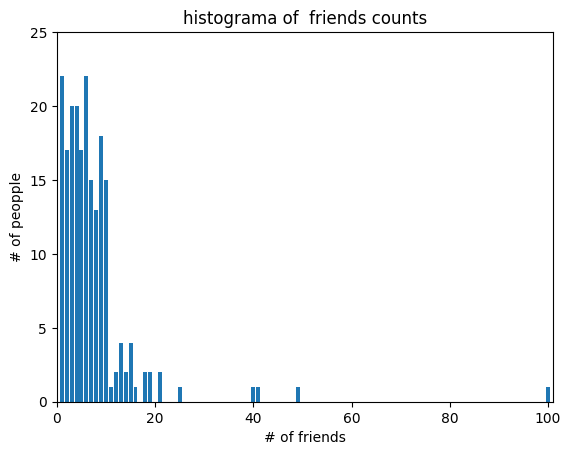

In [161]:
from collections import Counter
import matplotlib.pyplot as plt

num_friends = [100, 49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 14, 14, 13, 13, 13, 13, 12, 12, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs,ys)
plt.axis([0,101,0,25])
plt.title("histograma of  friends counts")
plt.xlabel("# of friends")
plt.ylabel("# of peopple")

plt.show()

In [162]:
num_points = len(num_friends)

In [163]:
largest_value = max(num_friends)
smallest_value = min(num_friends)

In [164]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]               # 1
second_smallest_value = sorted_values[1]        # 1
second_largest_value = sorted_values[-2]        # 49

In [165]:
def mean(xs: List[float]) -> float:
    return sum(xs)/len(xs)

mean(num_friends)

7.333333333333333

In [166]:
# los guiones bajos indican que son funciones "privadas", destinadas a ser llamadas por nuestra funcion mediana pero no por otras personas que utilicen nuestra  libreria de estadisticas.

def _median_odd(xs: List[float])->float:
    """if len(xs) is even, it's the average is the middle elements"""
    return sorted(xs)[len(xs)//2]

def _median_even(xs: List[float]) -> float:
    """if len(xs) is even, it's the average of the middle two elemensts"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint-1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1,10,2,9,5]) == 5
assert median([1,9,2,10]) == (2+9)/2

median([1,10,2,9,5])

5

In [167]:
print(median(num_friends))

6.0


In [168]:
def quantile(xs: List[float],p:float) -> float:
    """returns the pth-percentile  value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

quantile(num_friends, 0.25)

3

In [169]:
def mode(x:List[float]) -> List[float]:
    """returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

assert set(mode(num_friends)) == {1,6}

mode(num_friends)

[6, 1]

In [170]:
# "range" ya significa algo en Python, asi que usaremos otro nombre
def data_range(xs: list[float])-> float:
    return max(xs)-min(xs)
assert data_range(num_friends) == 99

data_range(num_friends)

99

In [171]:
from typing import List
#from scratch.linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> float:
    """traslatexs by subtrating its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x-x_bar for x in xs]

def variance(xs: list[float]) -> float:
    """al,ost the average squared devitation from mean"""
    assert len(xs) >= 2, "variance requieres at least two elements"
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n-1)

assert 81.54 < variance(num_friends) < 81.55

In [172]:
import math
def standar_deviation(xs: List[float]) -> float:
    """the standar deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standar_deviation(num_friends) < 9.04

standar_deviation(num_friends)

9.030144736232474

In [173]:
def interquartile_range(xs:List[float]) -> float:
    """returns the difference between the 75%-ile and 25%-ile"""
    return quantile(xs,0.75)-quantile(xs,0.25)

assert interquartile_range(num_friends) == 6

interquartile_range(num_friends)

6

In [174]:
from typing import List

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
daily_hours = [m / 60 for m in daily_minutes]

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"
    return dot(de_mean(xs), de_mean(ys)) / (len(xs)-1)
assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60

In [175]:
def correlation(xs:List[float],ys:List[float]) -> float:
    """measures how much xs and ys cary in tandem about their means"""
    stdev_x = standar_deviation(xs)
    stdev_y = standar_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x /stdev_y
    else:
        return 0
    
assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

correlation(num_friends, daily_minutes), correlation(num_friends,daily_hours)

(0.24736957366478227, 0.24736957366478227)

In [176]:
outlier = num_friends.index(100)

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]
daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]
daily_hours_good = [dm /60 for dm in daily_minutes_good]

assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58

capitulo 6: probabilidad

In [177]:
import enum, random
# un enum es un conjunto con nombre de valores enumerados. podemos usarlos para que el codigo sea mas descriptivo y legible

class Kid(enum.Enum):
    BOY = 0
    GIRL = 0

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print("P(both | older): ", both_girls / older_girl)
print("P(both | eithr=er): ", both_girls / either_girl)

P(both | older):  1.0
P(both | eithr=er):  1.0


In [178]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

uniform_pdf(0.1)

1

In [179]:
def uniform_cdf(x: float) -> float:
    """return the probability that a uniform random variable is <= x"""
    if x < 0:
        return 0
    elif x < 1:
        return x
    else:
        return 1

In [180]:
import math

SQRT_TWO_PI = math.sqrt(2 * math.pi)
def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x -mu) ** 2/2/sigma ** 2)/(SQRT_TWO_PI * sigma))

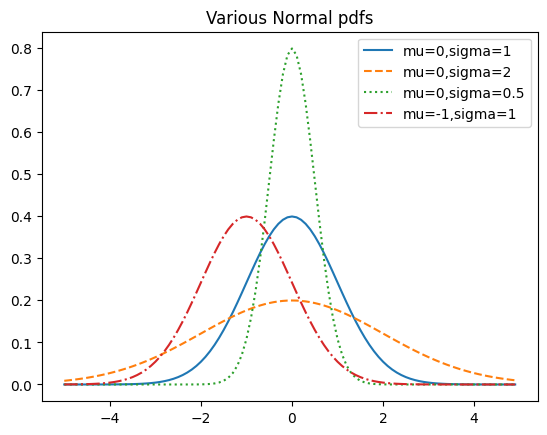

In [181]:
import matplotlib.pyplot as plt

xs = [x/10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

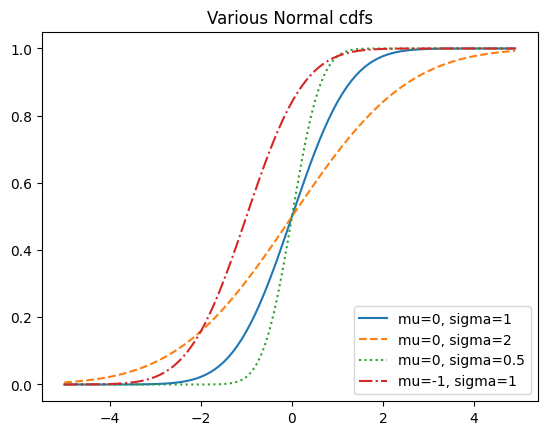

In [182]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs=[x/10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc = 4)
plt.title("Various Normal cdfs")
plt.show()

In [183]:
def inverse_normal_cdf(p:float =0, mu: float=0, sigma: float=1, tolerance: float = 0.00001) -> float:
    """find approximate inverse using binary search"""
    # si no es estandar, calcula estandar y redimensiona
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z = -10.0
    hi_z = 10.0
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z)/2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z
    return mid_z

inverse_normal_cdf()

-9.999990463256836

In [184]:
def bernolli_trial(p: float) -> int:
    """return 1 whot probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    """returns the sim of n bernilli(p) trials"""
    return sum(bernolli_trial(p) for _ in range(n))

bernolli_trial(0),
binomial(1,0)

0

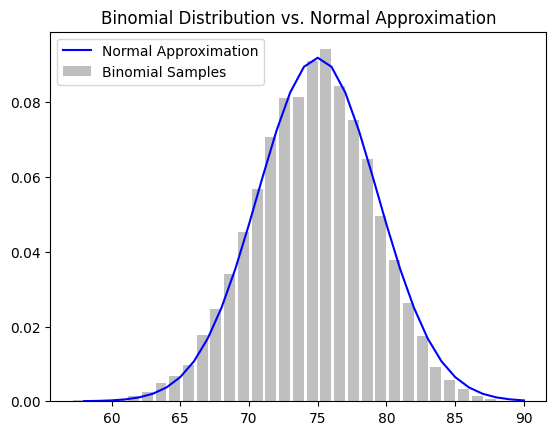

In [185]:
from collections import Counter
def binomial_histogram(p: float, n: int, num_points: int) -> None:
    data = [binomial(n, p) for _ in range(num_points)]
    histogram = Counter(data)
    
    # Barras del histograma
    plt.bar([x - 0.4 for x in histogram.keys()], 
            [v / num_points for v in histogram.values()], 
            0.8, color='0.75', label='Binomial Samples')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # Rango corregido para la línea normal
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    
    plt.plot(xs, ys, color='blue', label='Normal Approximation')
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.legend()
    plt.show()

binomial_histogram(0.75, 100, 10000)

capitulo 7: hipotesis e inferencia

In [186]:
from typing import Tuple
import math

def normal_approximation_to_binomial(n:int, p: float) -> Tuple[float, float]:
    """returns mu and sigma corresponding to a binomial(n, p)"""
    mu = p * n
    sigma = math.sqrt(p * (1-p) * n)
    return mu, sigma

In [187]:
import math
# la normal cdf _es_ la probabilidad de que la variable este por debajo de un limite
normal_probability_below = normal_cdf

# esta por encima del limite si no esta por debajo
def normal_probability_above(lo: float, mu: float = 0, sigma: float = 1) -> float:
    """the probability that an N(mu, sigma) is greater than lo."""
    return 1-normal_cdf(lo, mu, sigma)

# esta en medio si es menor que hi, pero no menor que lo

def normal_probability_between(lo: float, hi: float, mu: float = 0, sigma: float = 1) -> float:
    """the probability that an N(mu, sigma) is between lo and hi."""
    return normal_cdf(hi, mu, sigma) - (normal_cdf(lo, mu, sigma))

# esta fuera si no esta en medio

def normal_probability_outside(lo: float, hi: float, mu: float = 0,sigma: float = 1) -> float:
    """the probability that an N(mu, sigma) is not between lo and hi."""
    return 1-normal_probability_between(lo, hi, mu, sigma)

In [188]:
import math

def normal_upper_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """Returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability: float, mu: float = 0, sigma: float = 1) -> float:
    """Returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1-probability, mu, sigma)

def normal_two_sided_bounds(probability: float, mu: float = 0, sigma: float = 1) -> Tuple[float, float]:
    """Returns the symmetric (about the mean) bounds that contain the specified probability """
    tail_probability = (1-probability) / 2
    # el extremo superior tendría tail_probability por encima
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    # el extremo inferior tendría tail_probability por debajo
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound

In [189]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)

mu_0, sigma_0

(500.0, 15.811388300841896)

In [190]:
# (469, 531)
lower_bound, upper_bound = normal_two_sided_bounds(0.95, mu_0, sigma_0)

lower_bound, upper_bound

(469.01026640487555, 530.9897335951244)

In [191]:
# extremos en 95% basados en suponer que p es 0,5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)
# mu y sigma reales basadas en p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
# un eror de tipo 2 significa que no rechazamos la hipotesis nula lo que ocurrira cuando X siga en nuestro intervalo original
typer_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - typer_2_probability

power

0.8865480012953671

In [192]:
hi = normal_upper_bound(0.95, mu_0, sigma_0)
# es 526 (<531, ya que necesitamos mas probabilidad en el limite superior)
typer_2_probability = normal_probability_below(hi, mu_1, sigma_1)
power = 1 - typer_2_probability
power
round(power,3)

0.936

In [193]:
def two_sided_p_value(x: float, mu: float = 0, sigma: float = 1) -> float:
    """how likely are we to see a value at least as extreme as x (in either direction) if our values re from an N(x, mu, sigma)"""
    if x >= mu:
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # x es mayor que la media, asiel extremo es todo lo que es menor que x
        return 2 * normal_probability_below(x, mu,sigma)

two_sided_p_value(529.5, mu_0, sigma_0)

0.06207721579598835

In [194]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt(p_hat * (1 - p_hat) / 1000)
normal_two_sided_bounds(0.95, mu, sigma)

(0.5091095927295919, 0.5708904072704082)

In [195]:
from typing import List
def run_experiment() -> List[bool]:
    """Flips a fair coin 1000 times, True = heads, False = tails"""
    return [random.random() < 0.5 for _ in range(1000)]
def reject_fairness(experiment: List[bool]) -> bool:
    """Using the 5% significance levels"""
    num_heads = len([flip for flip in experiment if flip])
    return num_heads < 469 or num_heads > 531
random.seed(0)
experiments = [run_experiment() for _ in range(1000)]
num_rejections = len([experiment for experiment in experiments if reject_fairness(experiment)])
assert num_rejections == 46

In [196]:
def estimated_parameters(N: int, n: int) -> Tuple[float, float]:
    p = n / N
    sigma = math.sqrt(p * (1 - p) / N)
    return p, sigma

estimated_parameters(1000, 540)

(0.54, 0.015760710643876435)

In [197]:
def a_b_test_statistic(N_A: int, n_A: int, N_B: int, n_B: int) -> float:
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    return (p_B - p_A) / math.sqrt(sigma_A ** 2 + sigma_B ** 2)

In [198]:
z = a_b_test_statistic(1000, 200, 1000, 180)
round(z, 3)

-1.14

In [199]:
round(two_sided_p_value(z),3)

0.254

In [200]:
z = a_b_test_statistic(1000, 200, 1000, 150)
round(two_sided_p_value(z),3)

0.003

In [201]:
def B(alpha: float, beta: float) -> float:
    """a normalizin constant so that the total probability is 1"""
    return math.gamma(alpha) * math.gamma(beta) / math.gamma(alpha + beta)

def beta_pdf(x: float, alpha: float, beta:float) -> float:
    if x <= 0 or x >=1:
        return 0
    return x ** (alpha - 1 ) * (1 - x) ** (beta - 1) / B(alpha, beta)

capitulo 8: descenso y gradiente

In [202]:
from typing import List

def sum_of_squares(v: Vector) -> float:
    """computes the sum of squared elements in v"""
    return dot(v, v)

In [203]:
from typing import Callable

def difference_quotient(f: Callable[[float], float], x: float, h: float) -> float:
    return (f(x + h) - f(x)) / h

In [204]:
def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

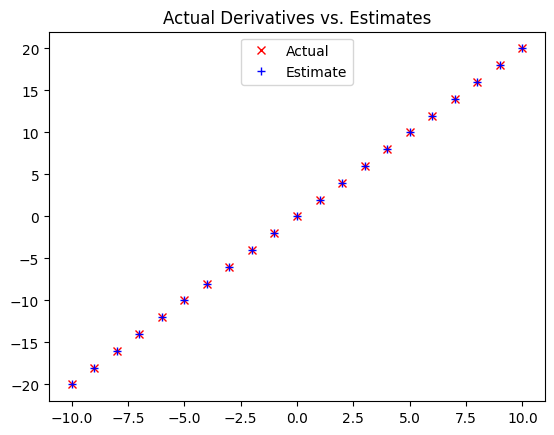

In [205]:
xs = range(-10, 11)
actuals = [derivative(x) for x in xs]
estimates = [difference_quotient(square, x, h=0.001) for x in xs]
# se traza para mostrar que son básicamente lo mismo
import matplotlib.pyplot as plt

plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual') # rojo x
plt.plot(xs, estimates, 'b+', label='Estimate') # azul +
plt.legend(loc=9)

plt.show()

In [206]:
from typing import List, Callable

Vector = List[float]

def partial_difference_quotient(f: Callable[[Vector], float], v: Vector, i: int, h: float) -> float:
    """returns the i-th partial difference quotient of at v"""
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

In [207]:
def estimate_gradient(f: Callable[[Vector], float], v:Vector, h: float= 0.0001):
    return [partial_difference_quotient(f, v, i, h) for i in range(len(v))]

In [208]:
import random
from typing import List

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves 'step_size' in the 'gradient' direction from 'v'"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]
# elige un punto de inicio aleatorio
v = [random.uniform(-10, 10) for i in range(3)]
for epoch in range(1000):
    grad = sum_of_squares_gradient(v)           # calcula el gradiente en v
    v = gradient_step(v, grad, -0.01)           # da un paso de gradiente negativo
    print(epoch, v)
assert distance(v, [0, 0, 0]) < 0.001           # v deveria estar cverca de 0

0 [-3.031113190728192, -7.112918777659467, 1.2997564714060637]
1 [-2.970490926913628, -6.970660402106278, 1.2737613419779423]
2 [-2.911081108375355, -6.831247194064152, 1.2482861151383835]
3 [-2.8528594862078482, -6.694622250182869, 1.2233203928356158]
4 [-2.795802296483691, -6.560729805179212, 1.1988539849789035]
5 [-2.7398862505540174, -6.429515209075627, 1.1748769052793255]
6 [-2.685088525542937, -6.3009249048941145, 1.1513793671737391]
7 [-2.631386755032078, -6.174906406796232, 1.1283517798302642]
8 [-2.5787590199314367, -6.051408278660308, 1.105784744233659]
9 [-2.527183839532808, -5.930380113087102, 1.0836690493489858]
10 [-2.476640162742152, -5.81177251082536, 1.061995668362006]
11 [-2.4271073594873087, -5.695537060608853, 1.040755754994766]
12 [-2.3785652122975627, -5.581626319396676, 1.0199406398948705]
13 [-2.3309939080516116, -5.469993793008743, 0.999541827096973]
14 [-2.2843740298905795, -5.360593917148568, 0.9795509905550336]
15 [-2.2386865492927677, -5.253382038805597, 0.

In [209]:
# x va de -50 a 49, y es siempre 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

In [210]:
def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept           # La predicción del modelo.
    error = (predicted-y)                       # el error es (previsto–real).
    squared_error = error ** 2                  # Minimizaremos el error cuadrático
    grad = [2 * error * x, 2 * error]           # usando su gradiente.
    return grad

In [211]:
from typing import List

# Empieza con valores aleatorios para pendiente e intersección
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
learning_rate = 0.001
for epoch in range(5000):
    # Calcula la media de los gradientes
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    # Da un paso en esa dirección
    theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.45061982476376, 0.9271257149384958]
1 [11.024363702597508, 0.9487220833333826]
2 [25.982698132450793, 0.9478490028693133]
3 [16.00548819465819, 0.9619360029960254]
4 [22.660301310165984, 0.9660176191846915]
5 [18.221545043738473, 0.9767458852564882]
6 [21.182206201711693, 0.9830139385297136]
7 [19.20745147739683, 0.9922301168543659]
8 [20.524622094693168, 0.999453108098054]
9 [19.646076515947755, 1.007978823976551]
10 [20.232074942686825, 1.0156089428445456]
11 [19.841221622170732, 1.0238097999015434]
12 [20.101928987812023, 1.031603401923911]
13 [19.928044968531303, 1.0396421241078753]
14 [20.04403364811373, 1.0474908848281907]
15 [19.96667704759297, 1.055439936706648]
16 [20.018281849192196, 1.0632957338808278]
17 [19.983869302322688, 1.0711874242622583]
18 [20.00683036277503, 1.0790289187160564]
19 [19.99152317694777, 1.0868776912413993]
20 [20.00174091866708, 1.0946954590358644]
21 [19.994933502708093, 1.1025078090364597]
22 [19.999481861502737, 1.110297726921095]
23 [19.9964

In [212]:
from typing import TypeVar, List, Iterator

T = TypeVar('T') # nos permite escribir funciones "genéricas"
def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    """Generates 'batch_size'-sized minibatches from the dataset"""
    # inicia índices 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    if shuffle:
        random.shuffle(batch_starts)
        # mezcla los lotes
        for start in batch_starts:
            end = start + batch_size
            yield dataset[start:end]

In [213]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [18.5059546501831, 0.11695936191728176]
1 [19.155133176535443, 0.4260321155431824]
2 [19.676772391903025, 0.428094456646997]
3 [20.278761586134618, 0.47417191694513866]
4 [20.03897536369434, 0.49918964060337534]
5 [21.807973493195828, 0.6158674570527627]
6 [19.10945292717411, 0.738506666050446]
7 [20.232670717488418, 0.7642035690517063]
8 [19.877344100988676, 0.8278061485162597]
9 [19.829064782078643, 0.849778606505679]
10 [20.662404243658212, 0.8944214454404114]
11 [19.90453661866907, 1.1027945965094428]
12 [20.001109768873643, 1.2751258433300465]
13 [20.2421925690876, 1.2875670997425845]
14 [20.061132301608996, 1.3103771458679827]
15 [20.107405135441002, 1.3368136216233448]
16 [20.750394830764016, 1.3717961097861686]
17 [20.0665830404686, 1.5676637966666789]
18 [19.870112326355258, 1.6302381468455913]
19 [19.877641198578793, 1.6500668598810133]
20 [20.109977736387915, 1.6882490993103194]
21 [19.48534478782362, 1.7290326938116483]
22 [19.920949170104823, 1.708740137829508]
23 [18.58

In [214]:
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate)
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.100361958686634, 0.0047746442555918495]
1 [20.096055413064192, 0.21908862074419508]
2 [20.091934286091345, 0.42420770889081993]
3 [20.087989953994043, 0.620526416441372]
4 [20.084214864344016, 0.8084223128294742]
5 [20.080601745696512, 0.9882567687328869]
6 [20.077143617979228, 1.1603756498611746]
7 [20.07383384728423, 1.3251099827212152]
8 [20.070666097598078, 1.4827765924716152]
9 [20.067634256456927, 1.6336787113893352]
10 [20.06473248795723, 1.7781065615156437]
11 [20.06195525231281, 1.916337913969026]
12 [20.059297120451912, 2.048638621452862]
13 [20.056753052616727, 2.175263130438912]
14 [20.054318137374626, 2.2964549716222953]
15 [20.05198767230129, 2.412447226592722]
16 [20.049757227676416, 2.5234629775716435]
17 [20.047622442659886, 2.6297157352265663]
18 [20.045579260975522, 2.731409849518087]
19 [20.04362373277726, 2.828740903498274]
20 [20.041752113788117, 2.921896088973864]
21 [20.039960784170756, 3.011054566374777]
22 [20.038246318198688, 3.096387809525087]
23 [20.0

capitulo 9: obtener datos

In [215]:
"""# egrep.py
import sys, re
# sys.argv es la lista de argumentos de línea de comandos
# sys.argv[0] es el nombre del propio programa
# sys.argv[1] será el regex especificado en la línea de comandos
regex = sys.argv[1]
# por cada línea pasada al script
for line in sys.stdin:
# si coincide con el regex, lo graba en stdout
    if re.search(regex, line):
        sys.stdout.write(line)
"""

'# egrep.py\nimport sys, re\n# sys.argv es la lista de argumentos de línea de comandos\n# sys.argv[0] es el nombre del propio programa\n# sys.argv[1] será el regex especificado en la línea de comandos\nregex = sys.argv[1]\n# por cada línea pasada al script\nfor line in sys.stdin:\n# si coincide con el regex, lo graba en stdout\n    if re.search(regex, line):\n        sys.stdout.write(line)\n'

In [216]:
"""
# line_count.py
import sys
count = 0
for line in sys.stdin:
    count += 1
# print va a sys.stdout
print(count)
"""

'\n# line_count.py\nimport sys\ncount = 0\nfor line in sys.stdin:\n    count += 1\n# print va a sys.stdout\nprint(count)\n'

In [217]:
# type SomeFilea.txt | python egrep.py "[0-9]" | python line_count.py

In [218]:
"""
# most_common_words.py
import sys

from collections import Counter
# pasa el número de palabras como primer argumento
try:
    num_words = int(sys.argv[1])
except:
    print("usage: most_common_words.py num_words")
    sys.exit(1)                                             # un código de salida no cero indica error
counter = Counter(word.lower()                              # palabras en minúscula
for line in sys.stdin
    for word in                                             # divide por espacios
    line.strip().split()
    if word)                                                # salta las 'palabras' vacías
for word, count in counter.most_common(num_words):
sys.stdout.write(str(count))
sys.stdout.write("\t")
sys.stdout.write(word)
sys.stdout.write("\n")
"""

'\n# most_common_words.py\nimport sys\n\nfrom collections import Counter\n# pasa el número de palabras como primer argumento\ntry:\n    num_words = int(sys.argv[1])\nexcept:\n    print("usage: most_common_words.py num_words")\n    sys.exit(1)                                             # un código de salida no cero indica error\ncounter = Counter(word.lower()                              # palabras en minúscula\nfor line in sys.stdin\n    for word in                                             # divide por espacios\n    line.strip().split()\n    if word)                                                # salta las \'palabras\' vacías\nfor word, count in counter.most_common(num_words):\nsys.stdout.write(str(count))\nsys.stdout.write("\t")\nsys.stdout.write(word)\nsys.stdout.write("\n")\n'

In [219]:
# $ type the_bible.txt | python most_common_words.py 10

In [220]:
"""
# 'r' significa solo lectura, se da por sentado si se omite
file_for_reading = open('reading_file.txt', 'r')
file_for_reading2 = open('reading_file.txt')
# 'w' es escribir — ¡destruirá el archivo si ya existe!
file_for_writing = open('writing_file.txt', 'w')
# 'a' es añadir - para añadir al final del archivo
file_for_appending = open('appending_file.txt', 'a')
# no olvide cerrar sus archivos al terminar
file_for_writing.close()
"""

"\n# 'r' significa solo lectura, se da por sentado si se omite\nfile_for_reading = open('reading_file.txt', 'r')\nfile_for_reading2 = open('reading_file.txt')\n# 'w' es escribir — ¡destruirá el archivo si ya existe!\nfile_for_writing = open('writing_file.txt', 'w')\n# 'a' es añadir - para añadir al final del archivo\nfile_for_appending = open('appending_file.txt', 'a')\n# no olvide cerrar sus archivos al terminar\nfile_for_writing.close()\n"

In [221]:
"""
with open(filename) as f:
    data = function_that_gets_data_from(f)
# en este momento f ya se ha cerrado, así que no trate de usarlo process(data)
"""

'\nwith open(filename) as f:\n    data = function_that_gets_data_from(f)\n# en este momento f ya se ha cerrado, así que no trate de usarlo process(data)\n'

In [222]:
"""
starts_with_hash = 0
with open('input.txt') as f:
    for line in f:                          # mira cada línea del archivo
        if re.match("^#",line):             # usa un regex para ver si empieza por '#'
            starts_with_hash += 1           # si es así, suma 1 al total
"""

'\nstarts_with_hash = 0\nwith open(\'input.txt\') as f:\n    for line in f:                          # mira cada línea del archivo\n        if re.match("^#",line):             # usa un regex para ver si empieza por \'#\'\n            starts_with_hash += 1           # si es así, suma 1 al total\n'

In [223]:
# Just stick some data there
with open('email_addresses.txt', 'w') as f:
    f.write("joelgrus@gmail.com\n")
    f.write("joel@m.datasciencester.com\n")
    f.write("joelgrus@m.datasciencester.com\n")

def get_domain(email_address: str) -> str:
    """Split on '@' and return the last piece"""
    return email_address.lower().split("@")[-1]

# a couple of tests
assert get_domain('joelgrus@gmail.com') == 'gmail.com'
assert get_domain('joel@m.datasciencester.com') == 'm.datasciencester.com'

from collections import Counter

with open('email_addresses.txt', 'r') as f:
    domain_counts = Counter(get_domain(line.strip()) for line in f if "@" in line)

In [224]:
with open('tab_delimited_stock_prices.txt', 'w') as f:
    f.write("""6/20/2014\tAAPL\t90.91
6/20/2014\tMSFT\t41.68
6/20/2014\tFB\t64.5
6/19/2014\tAAPL\t91.86
6/19/2014\tMSFT\t41.51
6/19/2014\tFB\t64.34
""")

def process(date: str, symbol: str, closing_price: float) -> None:
    # Imaginge that this function actually does something.
    assert closing_price > 0.0

import csv

with open('tab_delimited_stock_prices.txt') as f:
    tab_reader = csv.reader(f, delimiter='\t')
    for row in tab_reader:
        date = row[0]
        symbol = row[1]
        closing_price = float(row[2])
        process(date, symbol, closing_price)


In [225]:
with open('colon_delimited_stock_prices.txt') as f:
    colon_reader = csv.DictReader(f, delimiter=':')
    for dict_row in colon_reader:
        date = dict_row["date"]
        symbol = dict_row["symbol"]
        closing_price = float(dict_row["closing_price"])
        process(date, symbol, closing_price)

In [226]:
todays_prices = {'AAPL': 90.91, 'MSFT': 41.68, 'FB': 64.5 }

with open('comma_delimited_stock_prices.txt', 'w') as f:
    csv_writer = csv.writer(f, delimiter=',')
    for stock, price in todays_prices.items():
        csv_writer.writerow([stock, price])

In [227]:
results = [["test1", "success", "Monday"],
           ["test2", "success, kind of", "Tuesday"],
           ["test3", "failure, kind of", "Wednesday"],
           ["test4", "failure, utter", "Thursday"]]

# don't do this!
with open('bad_csv.txt', 'w') as f:
    for row in results:
        f.write(",".join(map(str, row))) # might have too many commas in it!
        f.write("\n")                    # row might have newlines as well!


In [228]:
from bs4 import BeautifulSoup
import requests

# I put the relevant HTML file on GitHub. In order to fit
# the URL in the book I had to split it across two lines.
# Recall that whitespace-separated strings get concatenated.
url = ("https://raw.githubusercontent.com/"
      "joelgrus/data/master/getting-data.html")
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

In [229]:
first_paragraph = soup.find('p')        # or just soup.p

In [230]:
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()

In [231]:
first_paragraph_id = soup.p['id']           # da un KeyError si no hay 'id'
first_paragraph_id2 = soup.p.get('id')      # devuelve None si no hay 'id'

In [232]:
all_paragraphs = soup.find_all('p')         # o simplemente soup('p')
paragraphs_with_ids = [ p for p in soup('p') if p.get('id')]

In [233]:
important_paragraphs = soup('p', {'class' : 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p') if 'important' in p.get('class', [])]

In [234]:
# atencion: devolvera el mismo <span> varias veces
# si esta dentro de varios <div>s
# sea mas listo si ocurre esto

spans_inside_divs = [span for div in soup('div') for span in div('span')]
spans_inside_divs

[<span id="name">Joel</span>,
 <span id="twitter">@joelgrus</span>,
 <span id="email">joelgrus-at-gmail</span>]

Ejemplo: controlar el congreso

In [235]:
from bs4 import BeautifulSoup
import requests

url = "https://www.house.gov/representatives"
text = requests.get(url).text
soup = BeautifulSoup(text, "html5lib")
all_urls = [a['href'] for a in soup('a') if a.has_attr('href')]
print(len(all_urls))

967


In [236]:
import re
# debe enpezar con http:// o https://
# debe terminar con .house.gob o .house.gob/
regex = r"^https?://.*\.house\.gov/?$"
# escribamos algunas pruebas
assert re.match(regex, "http://joel.house.gov")
assert re.match(regex, "https://joel.house.gov")
assert re.match(regex, "http://joel.house.gov/")
assert re.match(regex, "https://joel.house.gov/")
assert not re.match(regex, "joel.house.gov")
assert not re.match(regex, "http://joel.house.com")
assert not re.match(regex, "https://joel.house.gov/biography")
# Ahora aplicamos
good_urls = [url for url in all_urls if re.match(regex, url)]
print(len(good_urls)) # aun 862 para mi

874


In [237]:
good_urls = list(set(good_urls))
print(len(good_urls))

437


In [238]:
html = requests.get('https://jayapal.house.gov').text
soup = BeautifulSoup(html, 'html5lib')
# usa un conjunto por que los enlaces podrian aparecer varias veces
links = {a['href'] for a in soup('a') if 'press releases' in a.text.lower()}
print(links)

{'https://jayapal.house.gov/category/press-releases/', 'https://jayapal.house.gov/category/news/'}


In [240]:
from typing import Dict, Set

press_releases: Dict[str, Set[str]] = {}
for house_url in good_urls:
    html = requests.get(house_url).text
    soup = BeautifulSoup(html, 'html5lib')
    pr_links = {a['href'] for a in soup('a') if 'press releases' in a.text.lower()}

    print(f"{house_url}: {pr_links}")
    press_releases[house_url] = pr_links

https://rulli.house.gov: set()
https://lawler.house.gov: {'/news/documentquery.aspx?DocumentTypeID=27'}
https://balint.house.gov: {'/news/documentquery.aspx?DocumentTypeID=27'}
https://boyle.house.gov/: {'/media-center/press-releases'}
https://gottheimer.house.gov: set()
https://hurd.house.gov/: {'/media/press-releases'}
https://palmer.house.gov/: {'/media-center/press-releases'}
https://hunt.house.gov: {'/media/press-releases'}
https://bost.house.gov/: {'/press-releases'}
https://clarke.house.gov/: {'https://clarke.house.gov/media-center/press/'}
https://haridopolos.house.gov/: {'/media/press-releases'}
https://carbajal.house.gov: {'/news/documentquery.aspx?DocumentTypeID=27'}
https://jackson.house.gov: {'/news/documentquery.aspx?DocumentTypeID=27'}
https://morgangriffith.house.gov/: {'/News/DocumentQuery.aspx?DocumentTypeID=2235'}
https://radewagen.house.gov: {'/media/press-releases'}
https://sorensen.house.gov: {'/media/press-releases'}
https://laurellee.house.gov: {'/media/press-re

In [243]:
def paragraph_mentions(text: str, keyword: str) -> bool:
    """returns True if a <p> inside the text mentions {keyword}"""
    soup = BeautifulSoup(text, 'html5lib')
    paragraphs = [p.get_text() for p in soup('p')]
    return any(keyword.lower() in paragraph.lower() for paragraph in paragraphs)

text = """<body><h1>Facebook</h1><p>Twitter</p>"""
assert paragraph_mentions(text, "twitter")
#assert paragraph_mentions(text, "facebook")

In [244]:
for house_url, pr_links in press_releases.items():
    for pr_link in pr_links:
        url = f"{house_url}/{pr_link}"
        text = requests.get(url).text
        if paragraph_mentions(text, 'data'):
            print(f"{house_url}")
            break

https://davidscott.house.gov/
https://clyde.house.gov
https://pressley.house.gov
https://harshbarger.house.gov
https://mcbride.house.gov/
https://morelle.house.gov
https://rutherford.house.gov
https://menendez.house.gov
https://scholten.house.gov
https://debbiedingell.house.gov/
https://perry.house.gov/
https://edwards.house.gov
https://johnjoyce.house.gov/
https://obernolte.house.gov
https://vandrew.house.gov
https://mann.house.gov
https://gwenmoore.house.gov
https://delbene.house.gov
https://mikethompson.house.gov/


In [246]:
{ "title" : "Data Science Book",
"author" : "Joel Grus",
"publicationYear" : 2019,
"topics" : [ "data", "science", "data science"] }

import json

serialized = """{ "title" : "Data Science Book", "author" : "Joel Grus", "publicationYear" : 2019, "topics" : [ "data", "science", "data science"] }"""
# analiza JSON para crear un dict de Python
deserialized = json.loads(serialized)

assert deserialized["publicationYear"] == 2019
assert "data science" in deserialized["topics"]

In [249]:
import requests, json

github_user = "joelgrus"
endpoint = f"https://api.github.com/users/{github_user}/repos"
repos = json.loads(requests.get(endpoint).text)

repos

[{'id': 112873601,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxMTI4NzM2MDE=',
  'name': 'advent2017',
  'full_name': 'joelgrus/advent2017',
  'private': False,
  'owner': {'login': 'joelgrus',
   'id': 1308313,
   'node_id': 'MDQ6VXNlcjEzMDgzMTM=',
   'avatar_url': 'https://avatars.githubusercontent.com/u/1308313?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/joelgrus',
   'html_url': 'https://github.com/joelgrus',
   'followers_url': 'https://api.github.com/users/joelgrus/followers',
   'following_url': 'https://api.github.com/users/joelgrus/following{/other_user}',
   'gists_url': 'https://api.github.com/users/joelgrus/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/joelgrus/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/joelgrus/subscriptions',
   'organizations_url': 'https://api.github.com/users/joelgrus/orgs',
   'repos_url': 'https://api.github.com/users/joelgrus/repos',
   'events_url': 'https://api.github.com/users/j

In [258]:
from collections import Counter
from dateutil.parser import parse
    
dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)   

In [260]:
last_5_repositories = sorted(repos, key=lambda r: r["pushed_at"], reverse=True)[:5]
    
last_5_languages = [repo["language"] for repo in last_5_repositories]

last_5_languages, last_5_repositories

(['Python', 'Python', 'Python', 'Svelte', 'Python'],
 [{'id': 1107207221,
   'node_id': 'R_kgDOQf6kNQ',
   'name': 'advent2025',
   'full_name': 'joelgrus/advent2025',
   'private': False,
   'owner': {'login': 'joelgrus',
    'id': 1308313,
    'node_id': 'MDQ6VXNlcjEzMDgzMTM=',
    'avatar_url': 'https://avatars.githubusercontent.com/u/1308313?v=4',
    'gravatar_id': '',
    'url': 'https://api.github.com/users/joelgrus',
    'html_url': 'https://github.com/joelgrus',
    'followers_url': 'https://api.github.com/users/joelgrus/followers',
    'following_url': 'https://api.github.com/users/joelgrus/following{/other_user}',
    'gists_url': 'https://api.github.com/users/joelgrus/gists{/gist_id}',
    'starred_url': 'https://api.github.com/users/joelgrus/starred{/owner}{/repo}',
    'subscriptions_url': 'https://api.github.com/users/joelgrus/subscriptions',
    'organizations_url': 'https://api.github.com/users/joelgrus/orgs',
    'repos_url': 'https://api.github.com/users/joelgrus/rep

In [1]:
import os

#cambie sin dudarlo sus claves directamente
CONSUMER_KEY = os.environ.get("h7oCFx3cZxnxI2kw1iFEuqSDk14")
CONSUMER_SECRET = os.environ.get("tPJ0x4BGf9eh6aGiJ3e59s7z8SAdwzVWVMblm2B5OoQxWunYkw")

In [7]:
import webbrowser
from twython import Twython

## 1. Obtiene cliente temporal
temp_cliente = Twython(CONSUMER_KEY, CONSUMER_SECRET)
temp_creds = temp_cliente.get_authentication_tokens() # Corregido: authentication
url = temp_creds['auth_url']

# Abrir el navegador para que el usuario obtenga el PIN
webbrowser.open(url)
PIN_CODE = input("Introduce el código PIN: ")

# 2. Usar el PIN para obtener tokens reales
auth_client = Twython(
    CONSUMER_KEY, 
    CONSUMER_SECRET, 
    temp_creds['oauth_token'], 
    temp_creds['oauth_token_secret']
)

final_step = auth_client.get_authorized_tokens(PIN_CODE) # Corregido: authorized

ACCESS_TOKEN = final_step['oauth_token']
ACCESS_TOKEN_SECRET = final_step['oauth_token_secret']

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

TwythonError: Twitter API returned a 400 (Bad Request), b'{"errors":[{"code":215,"message":"Bad Authentication data."}]}'